<a href="https://colab.research.google.com/github/tayfununal/2-Hidden-Layer-Neural-Networks/blob/master/henon_heiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [424]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

plt.style.use('seaborn-poster')

In [425]:
def T(px, py):
  return 0.5*(px**2 + py**2)

def V(x, y):
  return 0.5*(x**2 + y**2) + ((x**2)*y - (y**3)/3)

def H(x, y, px, py):
  return T(px, py) + V(x, y)

In [426]:
def dT(px_0=tf.constant(1.0), py_0=tf.constant(1.0)):
  px_0 = tf.constant(px_0)
  py_0 = tf.constant(py_0)
  with tf.GradientTape() as g:
    g.watch(px_0)
    g.watch(py_0)
    y = T(px_0, py_0)
  return g.gradient(y, [px_0, py_0])

def dV(x_0=tf.constant(1.0), y_0=tf.constant(1.0)):
  x_0 = tf.constant(x_0)
  y_0 = tf.constant(y_0)
  with tf.GradientTape() as g:
    g.watch(x_0)
    g.watch(y_0)
    y = V(x_0,y_0)
  return g.gradient(y, [x_0,y_0])

In [427]:
def symplectic_euler(dT=dT, dV=dV ,h=6*np.math.pi/501, initial_point= [0.0, 0.0, 0.0, 0.0]):

  t = np.arange(0.0, 6*np.math.pi, h)

  px = np.zeros(t.shape[0])
  py = np.zeros(t.shape[0])
  x = np.zeros(t.shape[0])
  y = np.zeros(t.shape[0])

  x[0] = initial_point[0]
  y[0] = initial_point[1]
  px[0] = initial_point[2]
  py[0] = initial_point[3]
  
  for i in range(0, t.shape[0]-1):

    x[i + 1] = x[i] + h * dT(px[i], py[i])[0]
    y[i + 1] = y[i] + h * dT(px[i], py[i])[1]

    px[i + 1] = px[i] - h * dV(x[i+1], y[i+1])[0]
    py[i + 1] = py[i] - h * dV(x[i+1], y[i+1])[1]
  
  z = np.concatenate((x.reshape(-1,1), y.reshape(-1,1), px.reshape(-1,1), py.reshape(-1,1)) , axis=1)
  return z, t

In [428]:
z, t = symplectic_euler(initial_point=[0.3, -0.3, 0.3, 0.15])

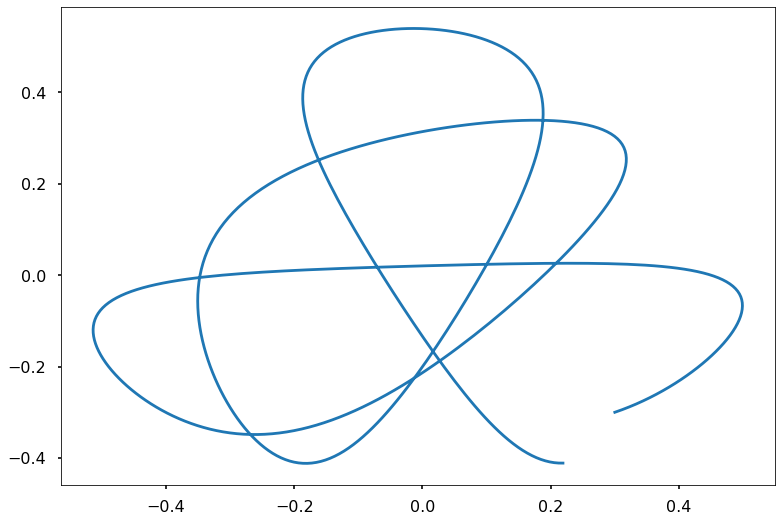

In [429]:
plt.plot(z[:,0], z[:,1])

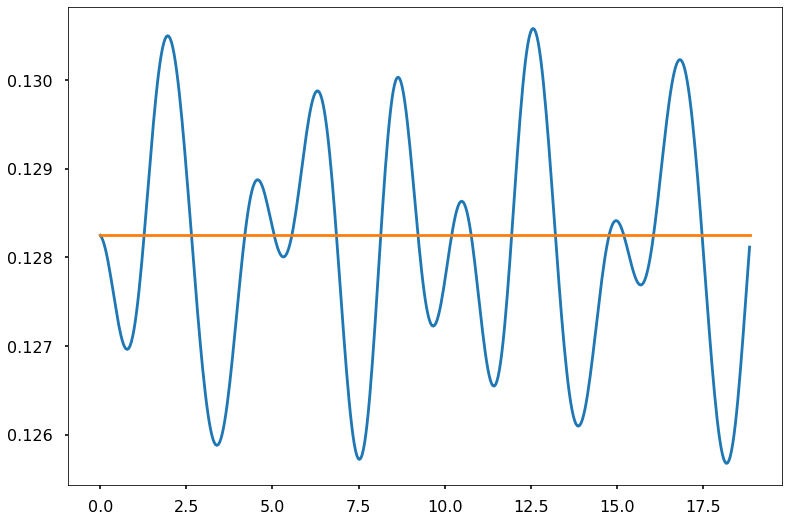

In [430]:
plt.plot(t,H(z[:,0], z[:,1], z[:,2], z[:,3]))
plt.plot(t,[H(0.3, -0.3, 0.3, 0.15) for i in range(len(t))])

In [431]:
H(0.3, -0.3, 0.3, 0.15)

0.12824999999999998